In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd

In [2]:
movie_data = pd.read_csv("movies.csv")
ratings_data = pd.read_csv("ratings.csv")

In [3]:
movie_data.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
available_genres = []
for index, genre in enumerate(movie_data.genres):
    for new in genre.split('|'):
        if new not in available_genres:
            available_genres.extend(genre.split('|'))
            
sorted(list(set(available_genres)))

['(no genres listed)',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

In [5]:
movie_data.loc[movie_data['genres']  == '(no genres listed)']

,movieId,title,genres
10172,126929,Li'l Quinquin ( ),(no genres listed)
10260,135460,Pablo (2012),(no genres listed)
10280,138863,The Big Broadcast of 1936 (1935),(no genres listed)
10301,141305,Round Trip to Heaven (1992),(no genres listed)
10303,141472,The 50 Year Argument (2014),(no genres listed)
10317,143709,The Take (2009),(no genres listed)
10328,149532,Marco Polo: One Hundred Eyes (2015),(no genres listed)


In [6]:
new_columns = sorted(list(set(available_genres)))[1:]

In [7]:
movie_genre = []
for genre in movie_data.genres:
    movie_genre.append(genre.split('|'))

In [8]:
for i in range(len(new_columns)):
    values = []
    for j in range(len(movie_genre)):
        if new_columns[i] in movie_genre[j]:
            values.append(1)
        else:
            values.append(0)
            
    movie_data[new_columns[i]] = values

In [10]:
#movie_data.drop('genres', axis=1, inplace=True)

In [11]:
movie_data.tail()

,movieId,title,genres,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
10324,146684,Cosmic Scrat-tastrophe (2015),Animation|Children|Comedy,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
10325,146878,Le Grand Restaurant (1966),Comedy,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
10326,148238,A Very Murray Christmas (2015),Comedy,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
10327,148626,The Big Short (2015),Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10328,149532,Marco Polo: One Hundred Eyes (2015),(no genres listed),0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
ratings_data.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


In [13]:
ratings_data.drop(columns=['userId','timestamp'], inplace=True)

In [14]:
ratings_data = ratings_data.sort_values('movieId')

In [15]:
ratings_data.head(150)

,movieId,rating
19960,1,4.5
76418,1,3.0
76243,1,4.0
76000,1,3.0
75826,1,5.0
...,...,...
5535,1,2.0
12248,1,5.0
91463,1,4.0
90940,1,4.0


In [16]:
new_ratings_data = pd.DataFrame()

In [17]:
movie_id = []
index = 0
check = []
for id_,rate in zip(ratings_data.movieId, ratings_data.rating):
    
    if id_ in check:
        pass
    else:
        check.append(id_)
        index+=1
        movie_id.append([])
    
    movie_id[index-1].append(rate)

In [18]:
for index, rate in enumerate(movie_id):
    movie_id[index] = round(sum(rate)/len(rate),2)

In [19]:
new_ratings_data = pd.DataFrame()

In [20]:
new_ratings_data['average_ratings'] = movie_id
new_ratings_data['movieId'] = check

In [21]:
len(movie_id)

10325

In [22]:
movie_data.shape

(10329, 22)

In [23]:
for num in movie_data.movieId:
    if num not in check:
        print(num)

7243
8785
54290
128991


In [24]:
movie_data.loc[movie_data['movieId'].isin([7243, 8785, 54290, 128991])]

,movieId,title,genres,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
5262,7243,Intolerance: Love's Struggle Throughout the Ag...,Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5795,8785,Early Summer (Bakushû) (1951),Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7439,54290,Bratz: The Movie (2007),Comedy,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
10195,128991,Johnny Express (2014),Animation|Comedy|Sci-Fi,0,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [25]:
new_ratings_data.tail(15)

,average_ratings,movieId
10310,3.00,143031
10311,4.00,143257
10312,4.50,143385
10313,3.50,143709
10314,0.50,143882
10315,3.00,144482
10316,3.50,144656
10317,3.00,144976
10318,2.00,146344
10319,3.50,146656


In [26]:
missing_movies = {'movieId':[7243, 8785, 54290, 128991], 'average_ratings': [2.5, 2.5, 2.5, 2.5]}
#Giving movies with no ratings an average 2.5

missing_movies = pd.DataFrame(missing_movies)
new_ratings_data = new_ratings_data.append(missing_movies, ignore_index=True)

In [28]:
new_ratings_data = new_ratings_data.sort_values('movieId')
new_ratings_data.tail()

,average_ratings,movieId
10320,4.00,146684
10321,2.50,146878
10322,3.00,148238
10323,4.33,148626
10324,4.00,149532


In [29]:
new_ratings_data.drop('movieId', axis=1, inplace=True)

In [30]:
new_ratings_data.head()

,average_ratings
0,3.91
1,3.35
2,3.19
3,2.82
4,3.25


In [31]:
movie_data = movie_data.join(new_ratings_data)

In [32]:
movie_data.head()

,movieId,title,genres,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,average_ratings
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,3.91
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,3.35
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,3.19
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,2.82
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,3.25


In [33]:
X = movie_data.iloc[:, 2:3]
X.head()

,genres
0,Adventure|Animation|Children|Comedy|Fantasy
1,Adventure|Children|Fantasy
2,Comedy|Romance
3,Comedy|Drama|Romance
4,Comedy


In [34]:
y = movie_data.iloc[:, 0:1]
y.head()

,movieId
0,1
1,2
2,3
3,4
4,5


In [35]:
#Tranforming texts (genres) to feature vectors to simulate a sort of value per genre(s)

from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(X['genres'])

In [36]:
print(tfidf_matrix[3])

  (0, 102)	0.5534472956791439
  (0, 61)	0.5530975959244714
  (0, 95)	0.27298132243798445
  (0, 161)	0.4467676667225915
  (0, 58)	0.3371334896732643


In [37]:
X.shape

(10329, 1)

In [132]:
#print(tf.get_feature_names())

In [39]:
indices = pd.Series(movie_data.index, index=movie_data['title'])
indices['Legion (2010)']

8399

In [40]:
movie_data.iloc[[2,3,4]]

,movieId,title,genres,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,average_ratings
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,3.19
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,2.82
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,3.25


In [41]:
#Creating a cosine similarity matrix with linear_kernel

from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [42]:
len(cosine_sim)

10329

In [44]:
import math
math.sqrt(len(y))

101.63168797181321

In [46]:
X_train = movie_data.iloc[:, 3:-1]
X_train.head()

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [47]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=15, p=2, metric='euclidean')
classifier.fit(X_train, y)

/Users/samuelbamgbola/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


KNeighborsClassifier(metric='euclidean', n_neighbors=15)

In [48]:
print(tfidf_matrix[0].shape)

(1, 178)


In [49]:
classifier.predict(movie_data.iloc[:, 3:-1][-2:-1])

array([31])

In [50]:
classifier.score(X_train, y)

0.01858844031367993

### This low accuracy score suggests that a lot of movies overlap eachother, therefore some movies are constantly being picked over others.

In [53]:
# Scaling data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
scaled_data = scaler.transform(X_train)

In [54]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)

PCA(n_components=2)

In [55]:
x_pca = pca.transform(scaled_data)
print(scaled_data.shape)
print(x_pca.shape)

(10329, 19)
(10329, 2)


Text(0, 0.5, 'Second Principal Component')

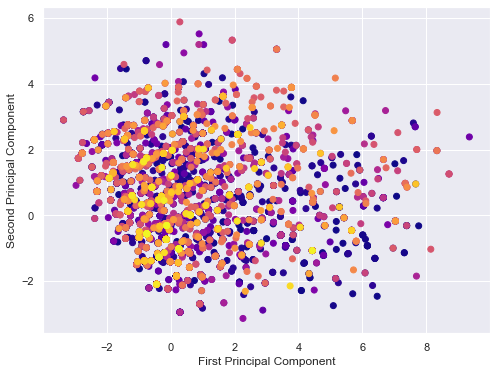

In [131]:
# Let's plot these two dimensions out

plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c=movie_data['movieId'], cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

### Discovered the genre of the movies gives no clear dispersion between the movies even after using PCA to get 2 components that give the best dispersion between the movies


### Resorted to use a relative correlation between movies based on genre using cosine_similarity and TfidfVectorizer. Therefore the movies that were more similar in terms of genre had a high positive correlation value.


In [57]:
cosine_sim

array([[1.        , 0.31264191, 0.06379193, ..., 0.16670199, 0.        ,
        0.        ],
       [0.31264191, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.06379193, 0.        , 1.        , ..., 0.38267045, 0.        ,
        0.        ],
       ...,
       [0.16670199, 0.        , 0.38267045, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [58]:
titles = movie_data['title']
indices = pd.Series(movie_data.index, index=movie_data['title'])

In [126]:
def genre_content(movie_title):
    index = indices[movie_title]
    
    top_recommendations = list(enumerate(cosine_sim[index]))
    top_recommendations.sort(key = lambda x: x[1], reverse=True)
    top_recommendations = [i[0] for i in top_recommendations[1:1001]]
    movies = list(titles[top_recommendations].values)
    
    top_rated = movie_data.loc[movie_data['title'].isin(movies)]
    top_rated = top_rated.sort_values('average_ratings')
    
    return top_rated.title[0:10].values

In [127]:
print(genre_content('Jumanji (1995)'))

['Night at the Museum: Secret of the Tomb (2014)'
 'Thomas and the Magic Railroad (2000)' 'Hercules in New York (1970)'
 'Garbage Pail Kids Movie, The (1987)'
 'Turbo: A Power Rangers Movie (1997)' 'Country Bears, The (2002)'
 'Rugrats Go Wild! (2003)' 'Good Burger (1997)' 'Gordy (1995)'
 'Sesame Street Presents Follow That Bird (1985)']


In [128]:
print(genre_content('Fast and the Furious: Tokyo Drift, The (Fast and the Furious 3, The) (2006)'))

['Unthinkable (2010)' 'Gone Girl (2014)'
 'Fast Five (Fast and the Furious 5, The) (2011)' 'Inside Man (2006)'
 'Angel of Death (2009)' 'Biker Boyz (2003)' 'Wild Tales (2014)'
 'In Hell (2003)' 'Torque (2004)' 'Best Men (1997)']
